In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 7.9 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9536078 sha256=9f1cddb8467cf42c61c3c65bf19af73cc3f26f9d5a03c25d5479ec55fd395603
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstan

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit

import pandas as pd
# import pybloqs as p
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import pybloqs.block.table_formatters as tf
import plotly.graph_objects as go
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [ ]:
df = pd.read_csv('processed_train.csv')
df.head(10)

Description        y1        y2        x1        x2        x3  \
0  2016-01-01 00:00:00  0.008133  0.805288  0.934119  0.182838  0.282637   
1  2016-01-01 00:05:00  0.008964  0.799772  0.934014  0.180689  0.281720   
2  2016-01-01 00:10:00  0.008906  0.809219  0.934031  0.181439  0.282202   
3  2016-01-01 00:15:00  0.008469  0.804602  0.934367  0.182620  0.282305   
4  2016-01-01 00:20:00  0.006882  0.799026  0.934884  0.180871  0.281051   
5  2016-01-01 00:25:00  0.008513  0.801384  0.933830  0.181452  0.282652   
6  2016-01-01 00:30:00  0.008589  0.799620  0.933954  0.181254  0.282584   
7  2016-01-01 00:35:00  0.008653  0.804140  0.933915  0.182905  0.283356   
8  2016-01-01 00:40:00  0.008137  0.802380  0.934468  0.182601  0.282141   
9  2016-01-01 00:45:00  0.007969  0.806117  0.934372  0.183060  0.282572   

         x4        x5        x6        x7  ...  hour month  minute  year  \
0  0.612302  0.218844  0.036615  0.695623  ...     0     1       0  2016   
1  0.611908  0.220869  0.037616  0.693026  ...     0     1       5  2016   
2  0.610927  0.222187  0.034264  0.692654  ...     0     1      10  2016   
3  0.612801  0.221935  0.034894  0.693397  ...     0     1      15  2016   
4  0.610566  0.218883  0.038596  0.690928  ...     0     1      20  2016   
5  0.612147  0.222160  0.037119  0.692054  ...     0     1      25  2016   
6  0.612522  0.225124  0.030487  0.691256  ...     0     1      30  2016   
7  0.611829  0.223631  0.031999  0.691691  ...     0     1      35  2016   
8  0.612130  0.214388  0.033619  0.692055  ...     0     1      40  2016   
9  0.613364  0.223763  0.030205  0.695446  ...     0     1      45  2016   

   year_month            Timestamp day day_of_week  target  quarter  
0     2016-01  2016-01-01 00:00:00   1           4      y2        1  
1     2016-01  2016-01-01 00:05:00   1           4      y2        1  
2     2016-01  2016-01-01 00:10:00   1           4      y2        1  
3     2016-01  2016-01-01 00:15:00   1           4      y2        1  
4     2016-01  2016-01-01 00:20:00   1           4      y2        1  
5     2016-01  2016-01-01 00:25:00   1           4      y2        1  
6     2016-01  2016-01-01 00:30:00   1           4      y2        1  
7     2016-01  2016-01-01 00:35:00   1           4      y2        1  
8     2016-01  2016-01-01 00:40:00   1           4      y2        1  
9     2016-01  2016-01-01 00:45:00   1           4      y2        1  

[10 rows x 22 columns]

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Description'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df.shape

(157836, 22)

In [ ]:
def feature_engineering(df, columns):
    window = 14*24*12

    for column in columns:
        # df[f'{column}_shift_5min'] = df[column].shift(1)
        # df[f'{column}_shift_1h'] = df[column].shift(1 * 12)
        # df[f'{column}_shift_1d'] = df[column].shift(1 * 12 * 24)
        # df[f'{column}_shift_1w'] = df[column].shift(1 * 12 * 24 * 7)
        df[f'{column}_shift_14d'] = df[column].shift(1 * window)
        df[f'{column}_shift_28d'] = df[column].shift(2 * window)
        df[f'{column}_shift_1m'] = df[column].shift(1 * 12 * 24 * 7 * 4)
        df[f'{column}_shift_42d'] = df[column].shift(3 * window)
        df[f'{column}_shift_56d'] = df[column].shift(4 * window)
        df[f'{column}_shift_2m'] = df[column].shift(1 * 12 * 24 * 7 * 8)
    return df

In [ ]:
# since x5 is strongly correlated to x4
df = feature_engineering(df, columns=['x4', 'x5']) 

In [ ]:
df = df[~df.isnull().any(axis=1)]

Test on sampling 1 hour

In [ ]:
resampled_df = df.resample('1H', on='Timestamp').mean().reset_index(drop=False)

In [ ]:
def train_eval(resampled_df, target_column, feature_columns, sample_result=False):

  # feature_columns = [
  #     'x1_shift_14d',
  #     'x1_shift_28d', 'x1_shift_42d', 'x2_shift_14d', 'x2_shift_28d',
  #     'x2_shift_42d', 'x3_shift_14d', 'x3_shift_28d', 'x3_shift_42d',
  #     'x4_shift_14d', 'x4_shift_28d', 'x4_shift_42d', 'x5_shift_14d',
  #     'x5_shift_28d', 'x5_shift_42d', 'x6_shift_14d', 'x6_shift_28d',
  #     'x6_shift_42d', 'x7_shift_14d', 'x7_shift_28d', 'x7_shift_42d',
  #     'x8_shift_14d', 'x8_shift_28d', 'x8_shift_42d'
  # ]
  # target_column = 'x1'

  train_size = int(0.7 * len(resampled_df))

  multivariate_df = resampled_df[['Timestamp'] + [target_column] + feature_columns].copy()
  multivariate_df.columns = ['ds', 'y'] + feature_columns

  train = multivariate_df.iloc[:train_size, :]
  x_train, y_train = pd.DataFrame(multivariate_df.iloc[:train_size, [0]+ [*range(2,multivariate_df.shape[1])]]), pd.DataFrame(multivariate_df.iloc[:train_size, 1])
  x_valid, y_valid = pd.DataFrame(multivariate_df.iloc[train_size:, [0]+ [*range(2,multivariate_df.shape[1])]]), pd.DataFrame(multivariate_df.iloc[train_size:, 1])

  print('Train and validation size')
  print(len(y_train), len(y_valid))


# Train the model
  model = Prophet()
  for col in feature_columns:
    model.add_regressor(col)

  # Fit the model with train set
  model.fit(train.fillna(0))
  import pickle
  pkl_path = f"model_{target_column}.pkl"
  with open(pkl_path, "wb") as f:
      # Pickle the 'Prophet' model using the highest protocol available.
      pickle.dump(model, f)

  # Predict on valid set
  y_pred = model.predict(x_valid)

  # Calcuate metrics
  score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
  score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

  print('RMSE: {}'.format(score_rmse))

  f, ax = plt.subplots(1)
  f.set_figheight(10)
  f.set_figwidth(20)

  model.plot(y_pred, ax=ax)
  sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

  ax.set_title(f'Prediction \n MAE: {score_mae:.6f}, RMSE: {score_rmse:.6f}', fontsize=14)
  ax.set_xlabel(xlabel='Timestamp', fontsize=14)
  ax.set_ylabel(ylabel=target_column, fontsize=14)

  plt.show()

  f, ax = plt.subplots(1)
  f.set_figheight(10)
  f.set_figwidth(30)

  sns.lineplot(x=x_valid.index, y=y_pred['yhat'], ax=ax, color='blue', label='predicted') #navajowhite
  sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

  ax.set_xlabel(xlabel='Timestamp', fontsize=14)
  ax.set_ylabel(ylabel=target_column, fontsize=14)

  plt.show()

  if sample_result:
    sample_result = pd.DataFrame({'Timestamp': x_valid['ds'].reset_index(drop=True), 'pred_y': y_pred['yhat'], 'actual_y': y_valid['y'].reset_index(drop=True)})
    sample_result['Timestamp'] = pd.to_datetime(sample_result['Timestamp'], format='%Y-%m-%d %H:%M:%S')
    sample_result = sample_result.resample('1H', on='Timestamp').mean().reset_index(drop=False)

    f, ax = plt.subplots(1)
    f.set_figheight(10)
    f.set_figwidth(30)

    sns.lineplot(x=sample_result['Timestamp'], y=sample_result['pred_y'], ax=ax, color='blue', label='predicted') #navajowhite
    sns.lineplot(x=sample_result['Timestamp'], y=sample_result['actual_y'], ax=ax, color='orange', label='Ground truth') #navajowhite

    ax.set_xlabel(xlabel='Timestamp', fontsize=14)
    ax.set_ylabel(ylabel=target_column, fontsize=14)
    ax.set_title('Sample from predicted result by hour')

    plt.show()


In [ ]:
x5_feature_columns = ['x1', 'x4', 'x6', 'x7', 'x8', 'x4_shift_14d',
       'x4_shift_28d', 'x4_shift_1m', 'x4_shift_42d', 'x4_shift_56d',
       'x4_shift_2m', 'x5_shift_14d', 'x5_shift_28d', 'x5_shift_1m',
       'x5_shift_42d', 'x5_shift_56d', 'x5_shift_2m']

Train and validation size
6384 2736


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


RMSE: 0.058728302456371506


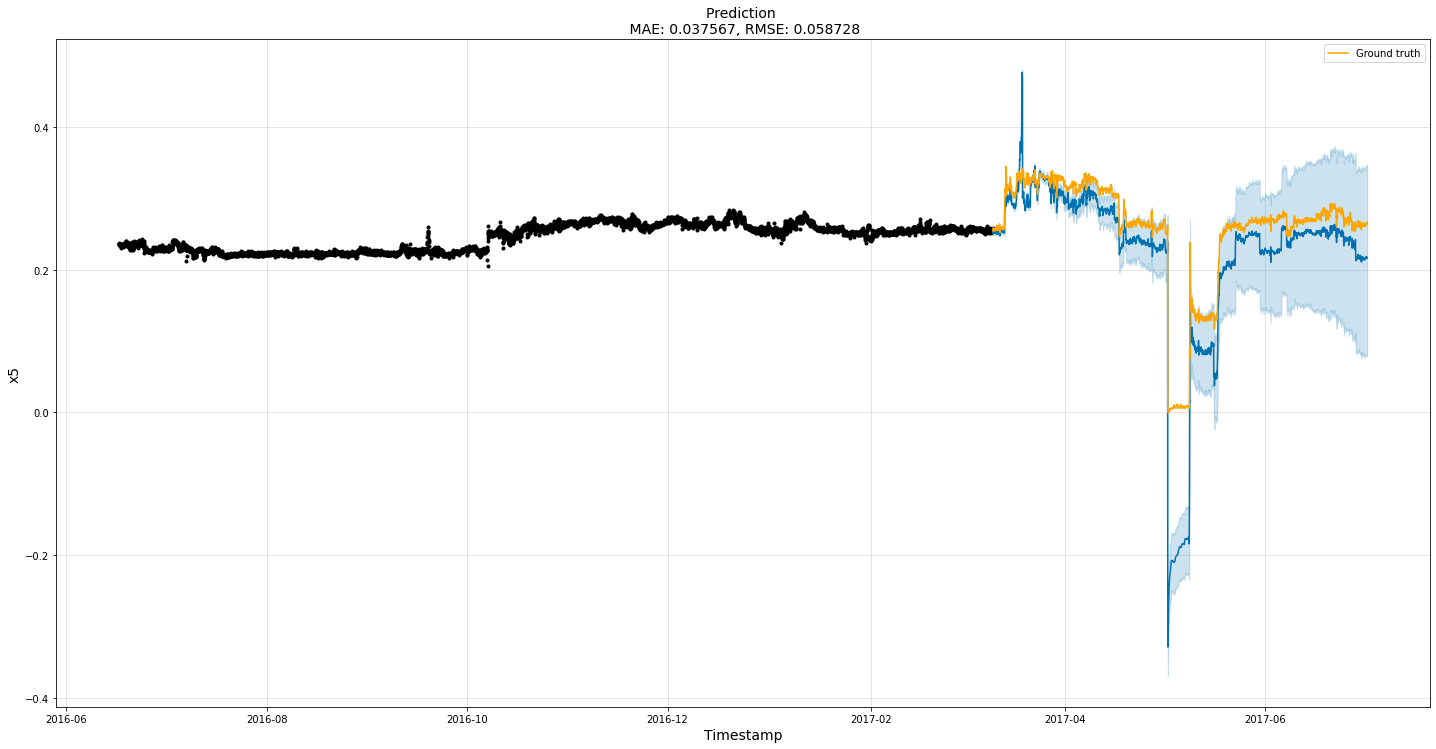

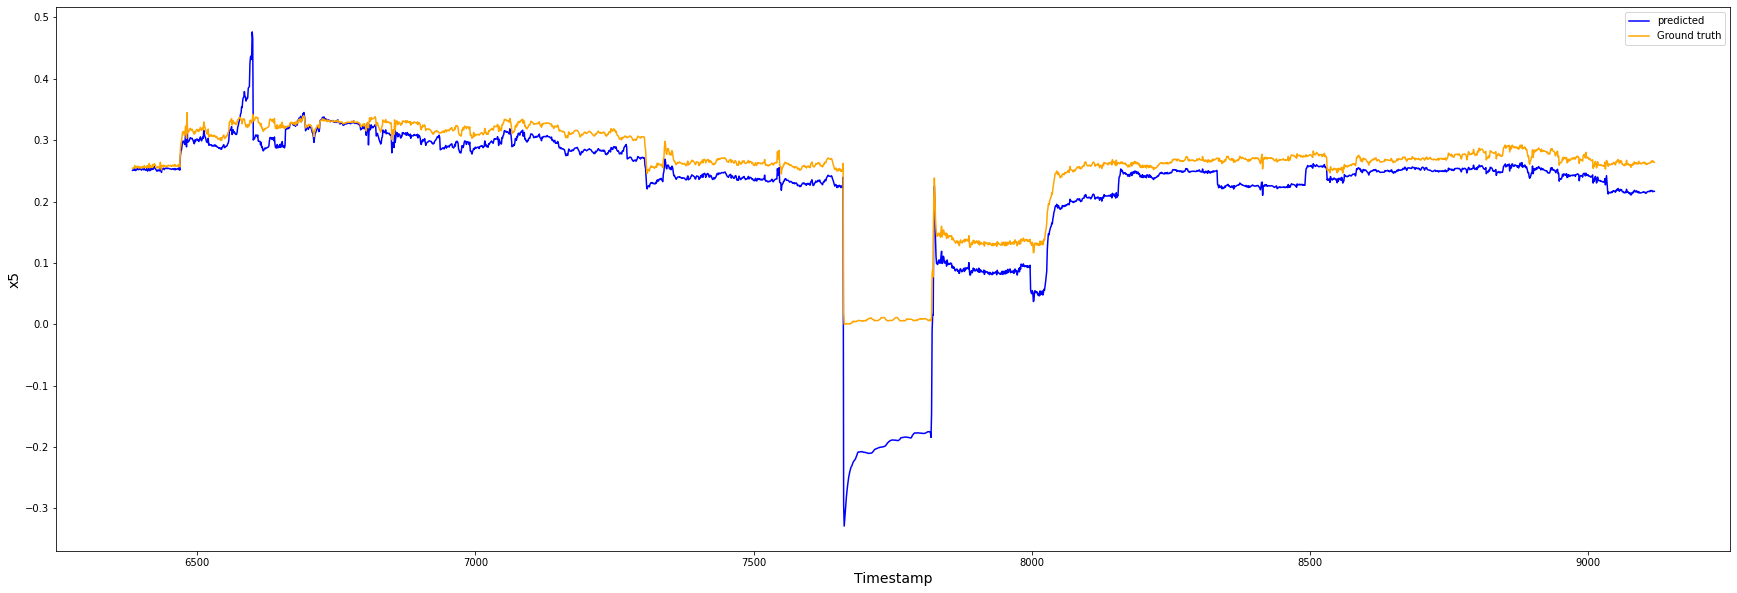

In [ ]:
train_eval(resampled_df, target_column='x5', feature_columns=x5_feature_columns)

The reason this model is quite good is that x4 and x5 is strongly correlated and x5 has very similar pattern with x5

train and validate for x5 without sampling

Train and validation size
76616 32836


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


RMSE: 0.07548555751234556


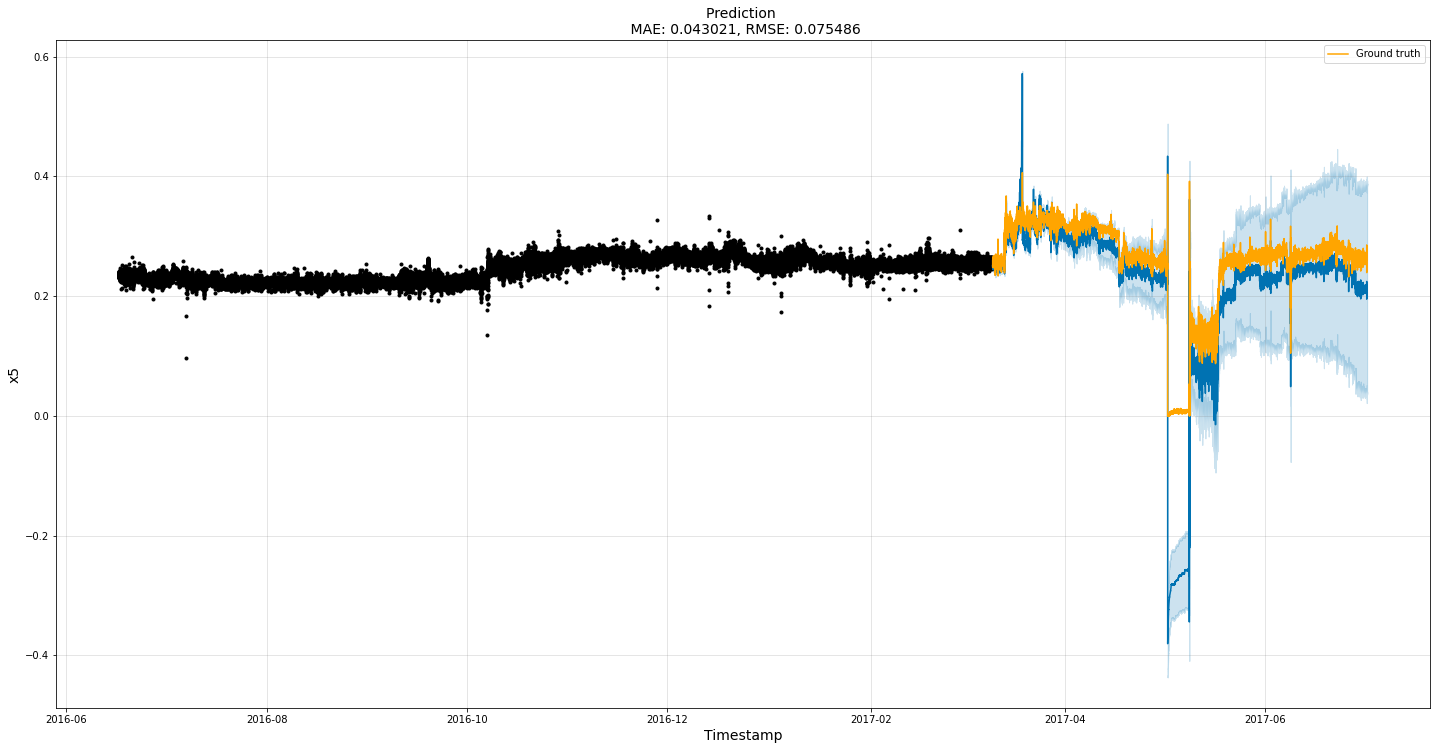

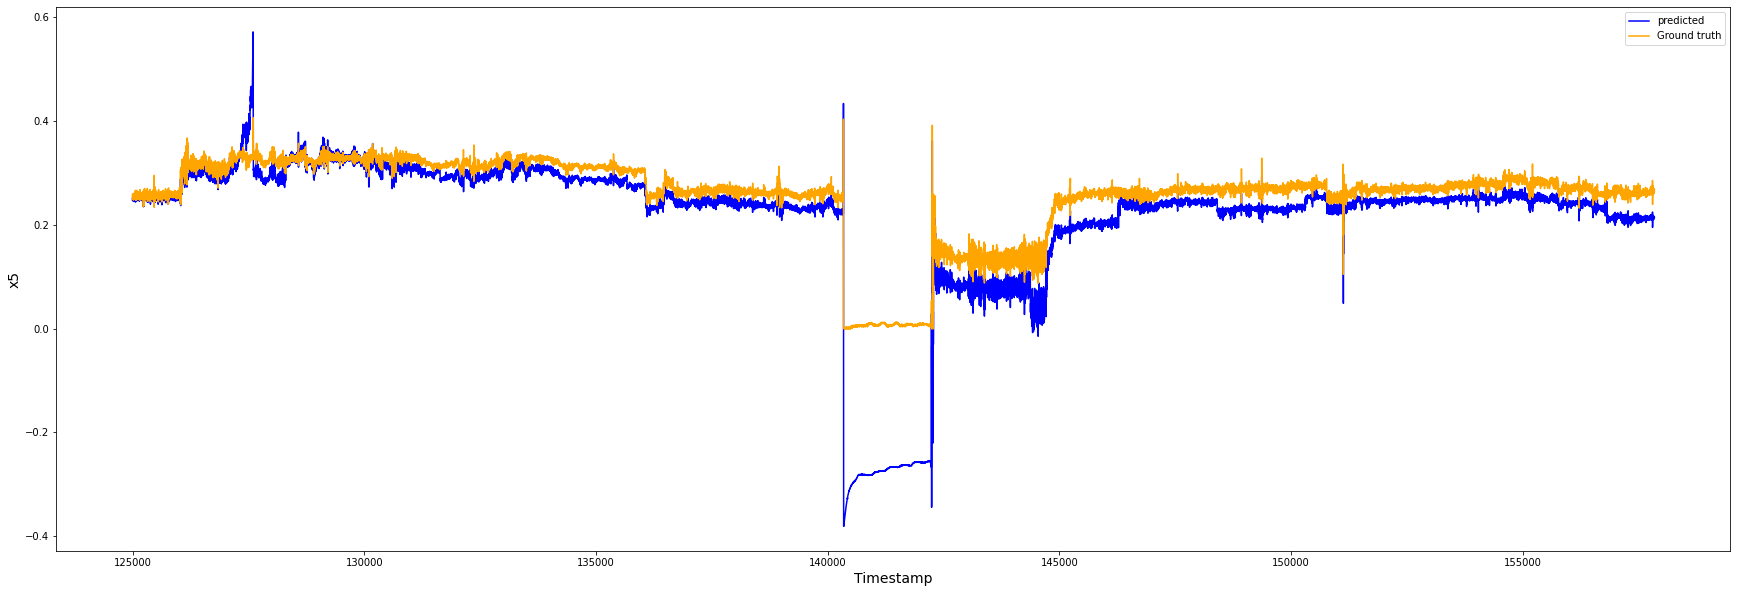

In [ ]:
train_eval(df, target_column='x5', feature_columns=x5_feature_columns)

Build model for predicting x2, x3 (have sampling)


In [ ]:
# since x5 is strongly correlated to x4
df = feature_engineering(df, columns=['x5', 'x2', 'x3']) 

In [ ]:
df = df[~df.isnull().any(axis=1)]
resampled_df = df.resample('1H', on='Timestamp').mean().reset_index(drop=False)

In [ ]:
x23_feature_columns = ['x1', 'x4', 'x5', 'x6', 'x7', 'x4_shift_14d',
       'x4_shift_28d', 'x4_shift_1m', 'x4_shift_42d', 'x4_shift_56d',
       'x4_shift_2m', 'x5_shift_14d', 'x5_shift_28d', 'x5_shift_1m',
       'x5_shift_42d', 'x5_shift_56d', 'x5_shift_2m', 'x2_shift_14d',
       'x2_shift_28d', 'x2_shift_1m', 'x2_shift_42d', 'x2_shift_56d',
       'x2_shift_2m', 'x3_shift_14d', 'x3_shift_28d', 'x3_shift_1m',
       'x3_shift_42d', 'x3_shift_56d', 'x3_shift_2m']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Train and validation size
5443 2333
RMSE: 0.40526209765182675


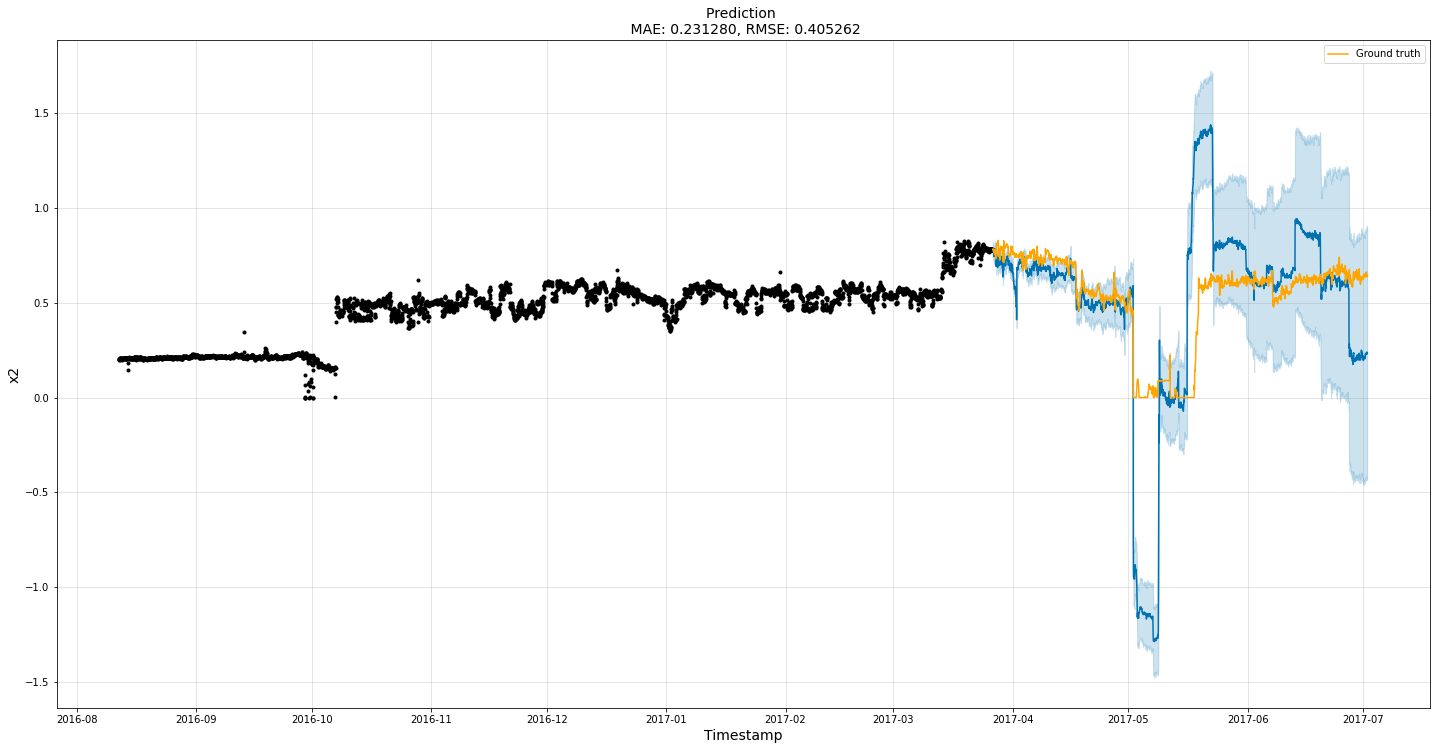

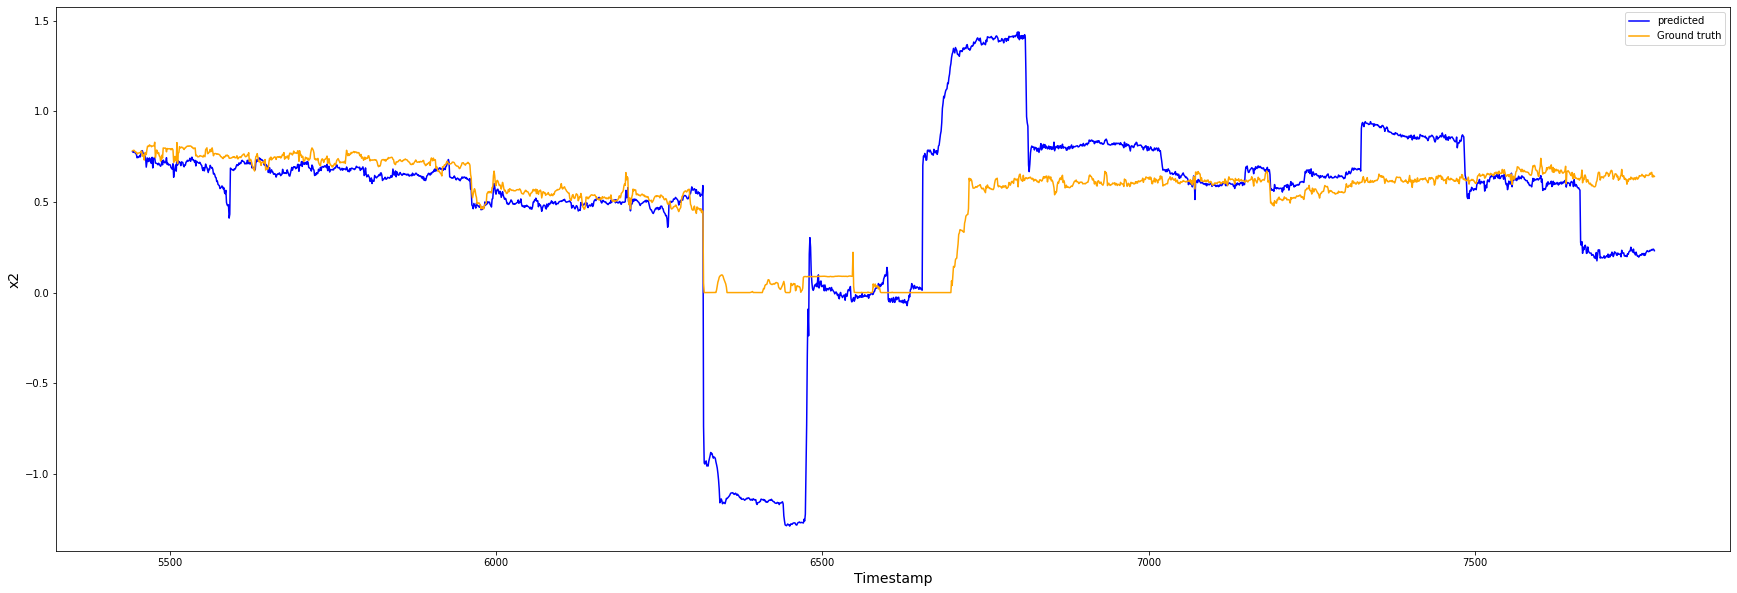

In [ ]:
train_eval(resampled_df, target_column='x2', feature_columns=x23_feature_columns)

Train and validation size
5443 2333


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


RMSE: 0.17664395761129648


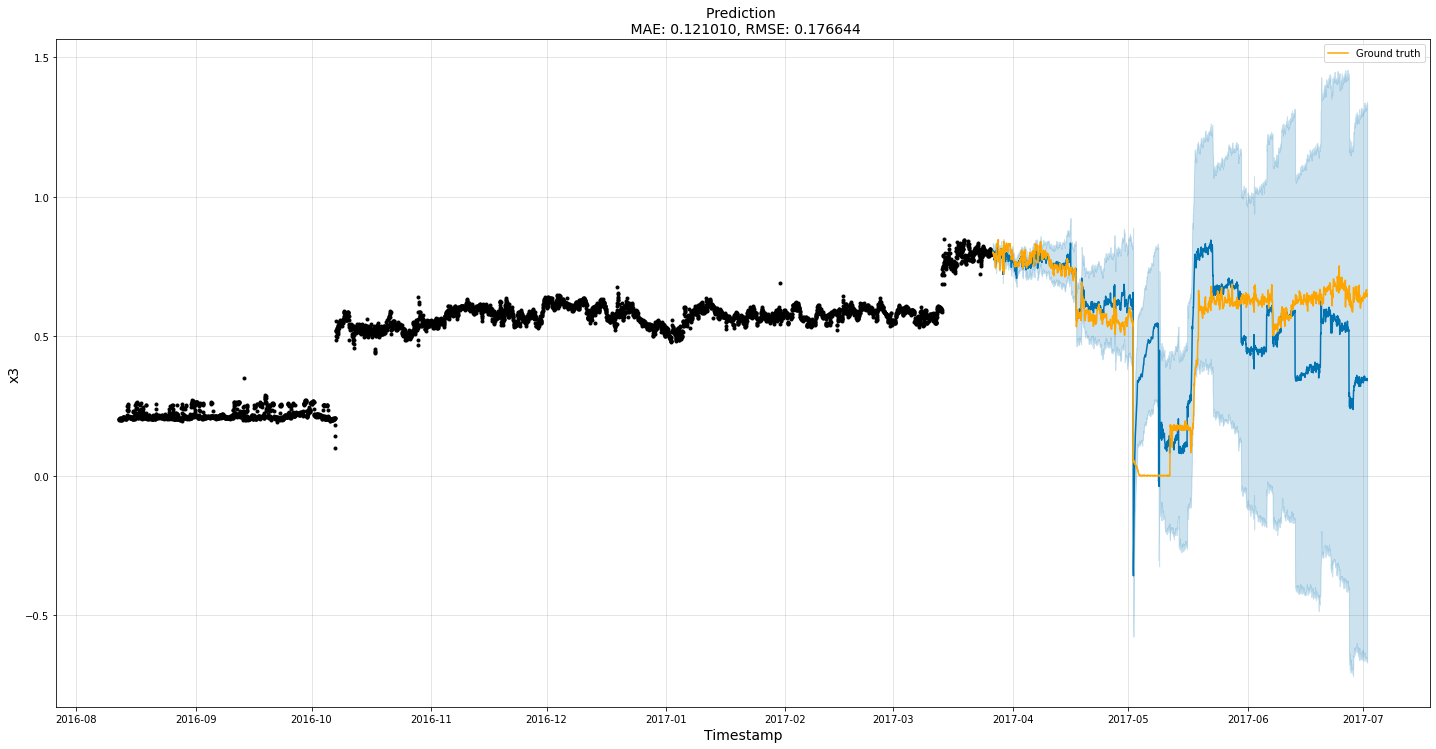

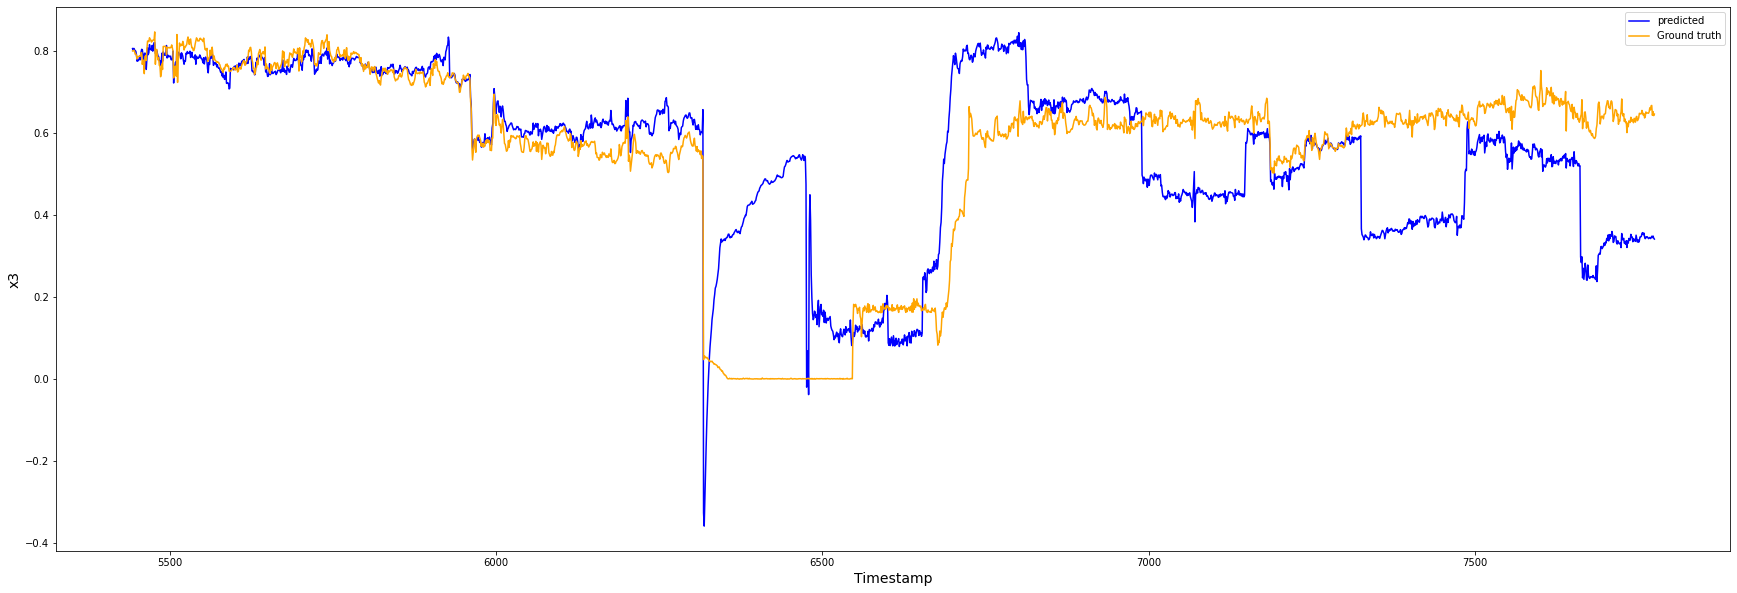

In [ ]:
train_eval(resampled_df, target_column='x3', feature_columns=x23_feature_columns)

Build model to predict x2, x3 without resampling

Train and validation size
65326 27998


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


RMSE: 0.4031430463333181


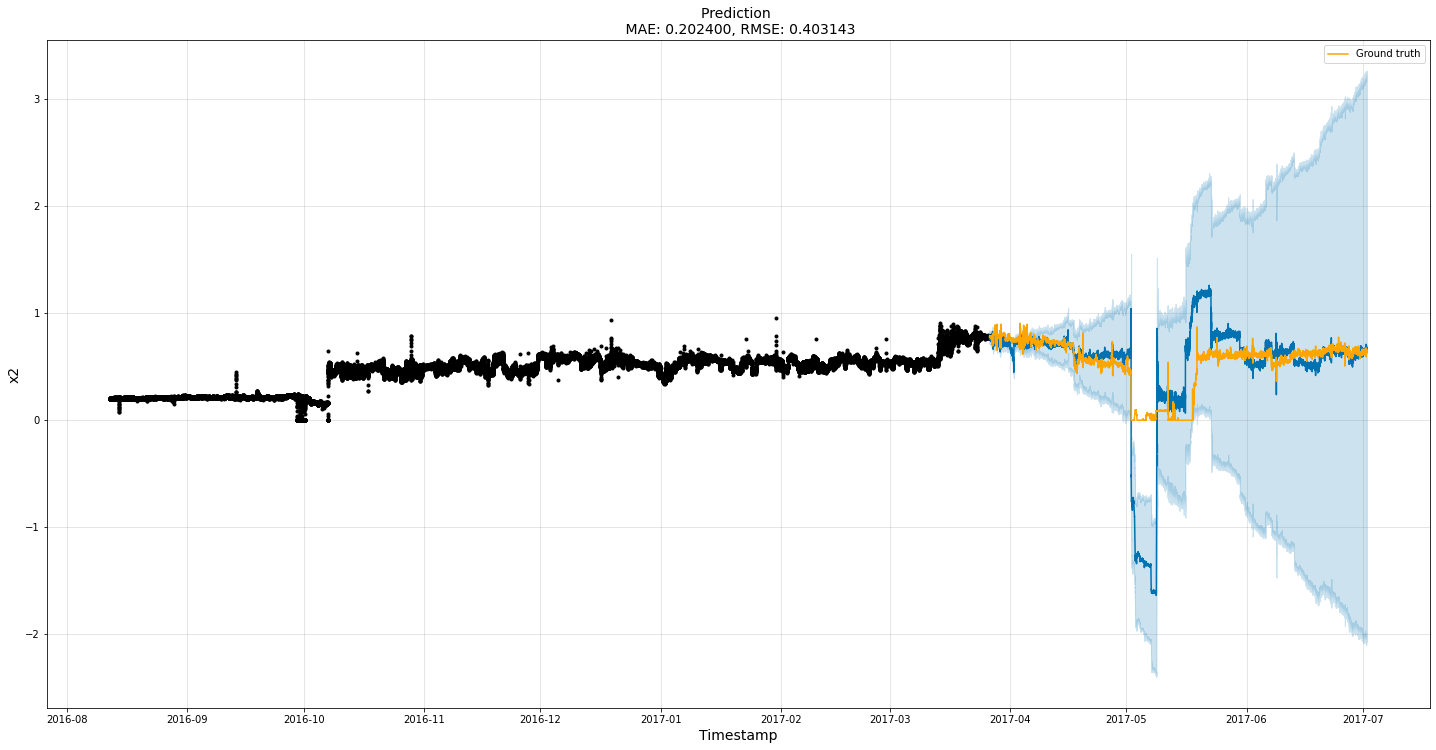

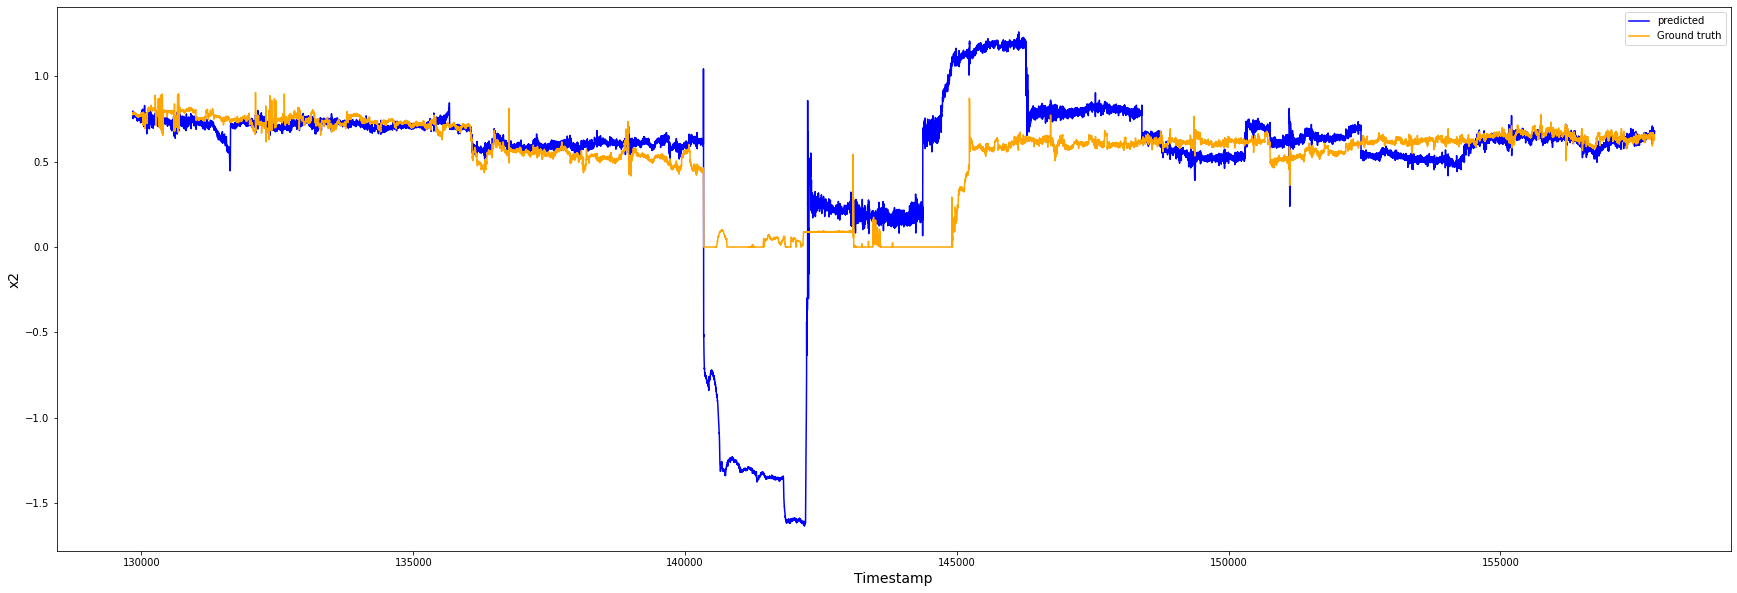

In [ ]:
train_eval(df, target_column='x2', feature_columns=x23_feature_columns)

Train and validation size
65326 27998


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


RMSE: 0.15965407028316533


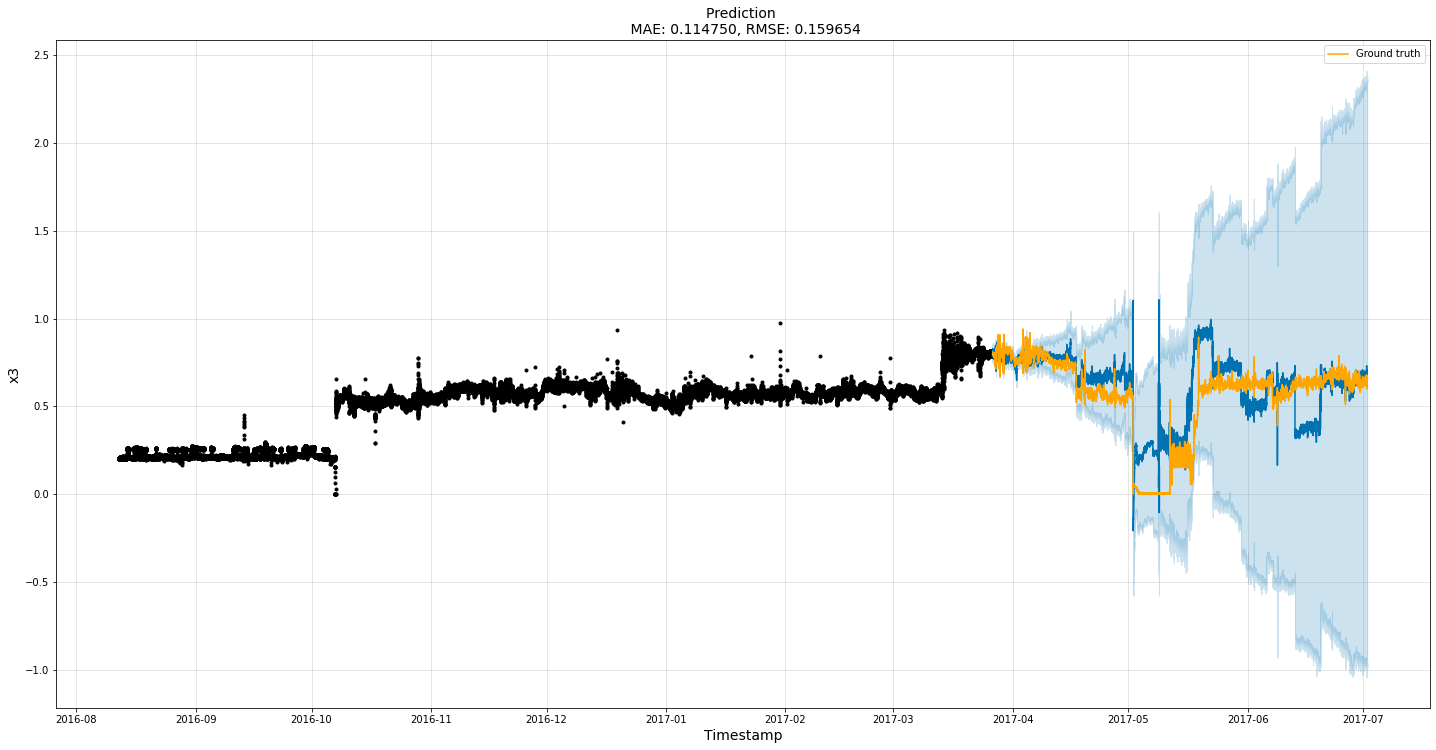

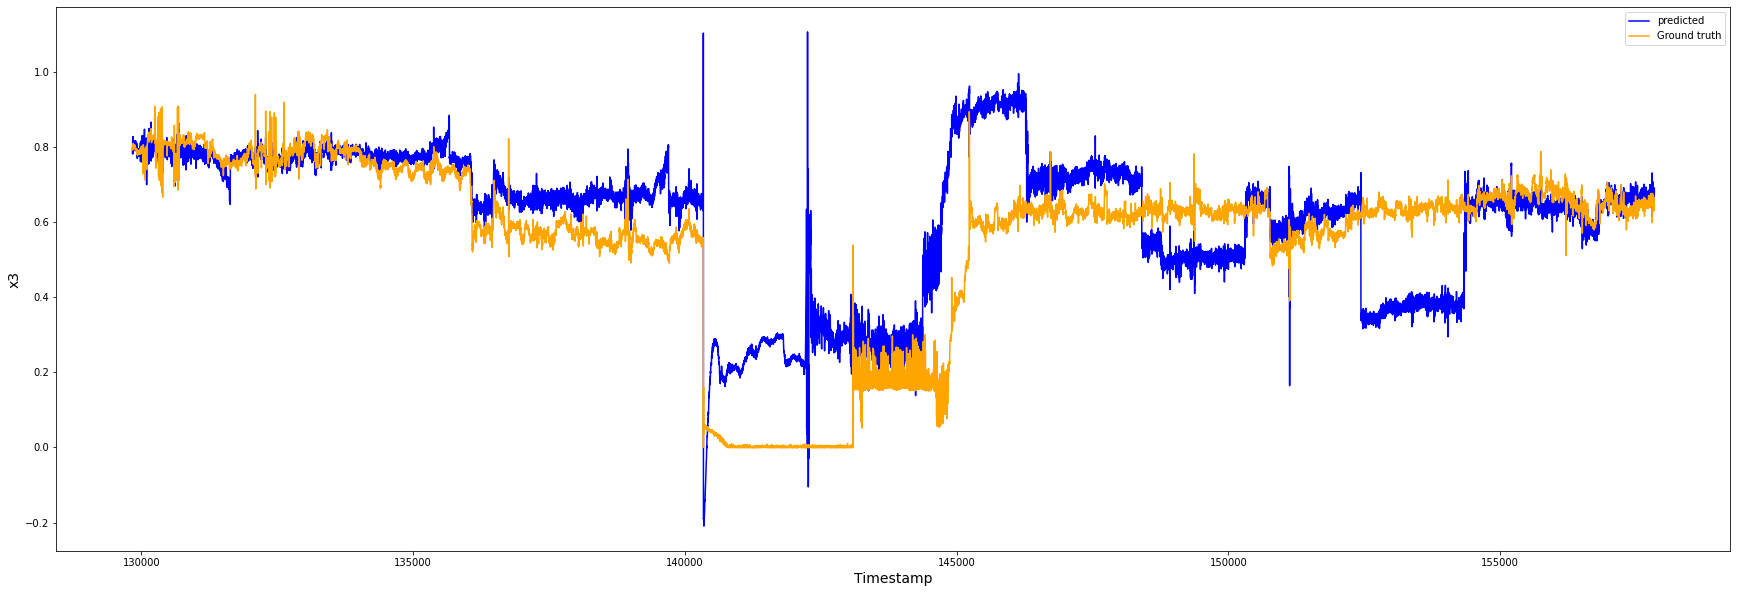

In [ ]:
train_eval(df, target_column='x3', feature_columns=x23_feature_columns)

Model predict quite good the trend of data x2, x3 but mae and mse of x2 is still high

We could directly use this model to predict 14 days after 2017/07/01 since it mainly correlated to other features